# REGRESIÓN - Video Game Sales Dataset

## LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## CARGAR Y EXPLORAR DATASET

In [63]:
# CARGAR EL DATASET
df_vgsales = pd.read_csv('vgsales.csv')


In [64]:
# EXPLORAR EL DATASET
df_vgsales.head(5)
df_vgsales.info()
df_vgsales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [65]:
# REVISAR TIPOS DE VARIABLES
df_vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [66]:
# Imprimir el número de valores únicos para cada columna
for column in df_vgsales.columns:
    num_unique_values = df_vgsales[column].nunique()
    print(f"Columna '{column}': {num_unique_values} valores únicos")

Columna 'Rank': 16598 valores únicos
Columna 'Name': 11493 valores únicos
Columna 'Platform': 31 valores únicos
Columna 'Year': 39 valores únicos
Columna 'Genre': 12 valores únicos
Columna 'Publisher': 578 valores únicos
Columna 'NA_Sales': 409 valores únicos
Columna 'EU_Sales': 305 valores únicos
Columna 'JP_Sales': 244 valores únicos
Columna 'Other_Sales': 157 valores únicos
Columna 'Global_Sales': 623 valores únicos


In [67]:
df_vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [68]:
publisher_counts = df_vgsales['Publisher'].value_counts()
top_publishers = publisher_counts.head(10)
top_publishers


Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

## ANALISIS EXPLORATORIO (EDA)

C:\Users\AITOR LANDAURO\AppData\Local\Temp\ipykernel_11508\178118376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette='viridis')


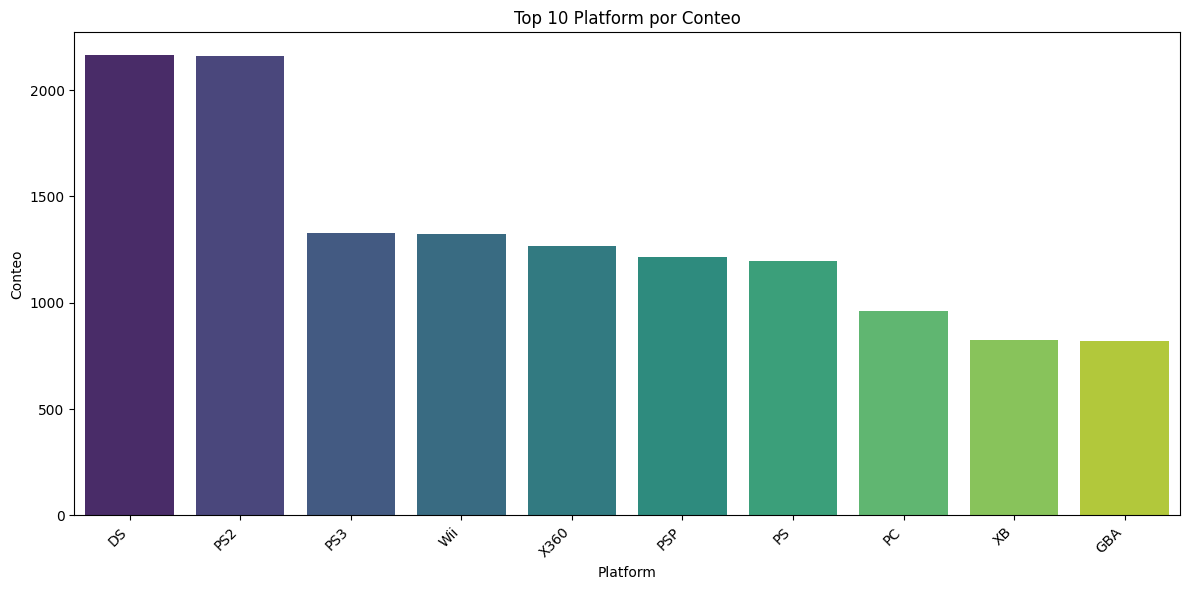

C:\Users\AITOR LANDAURO\AppData\Local\Temp\ipykernel_11508\178118376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette='viridis')


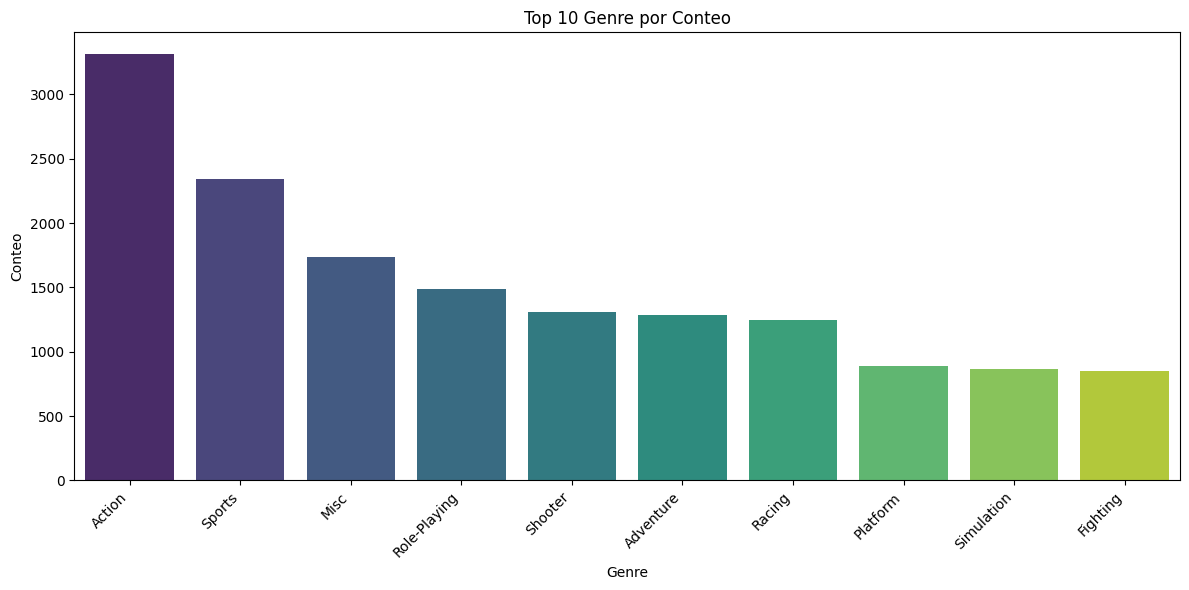

C:\Users\AITOR LANDAURO\AppData\Local\Temp\ipykernel_11508\178118376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.index, y=top_10_values.values, palette='viridis')


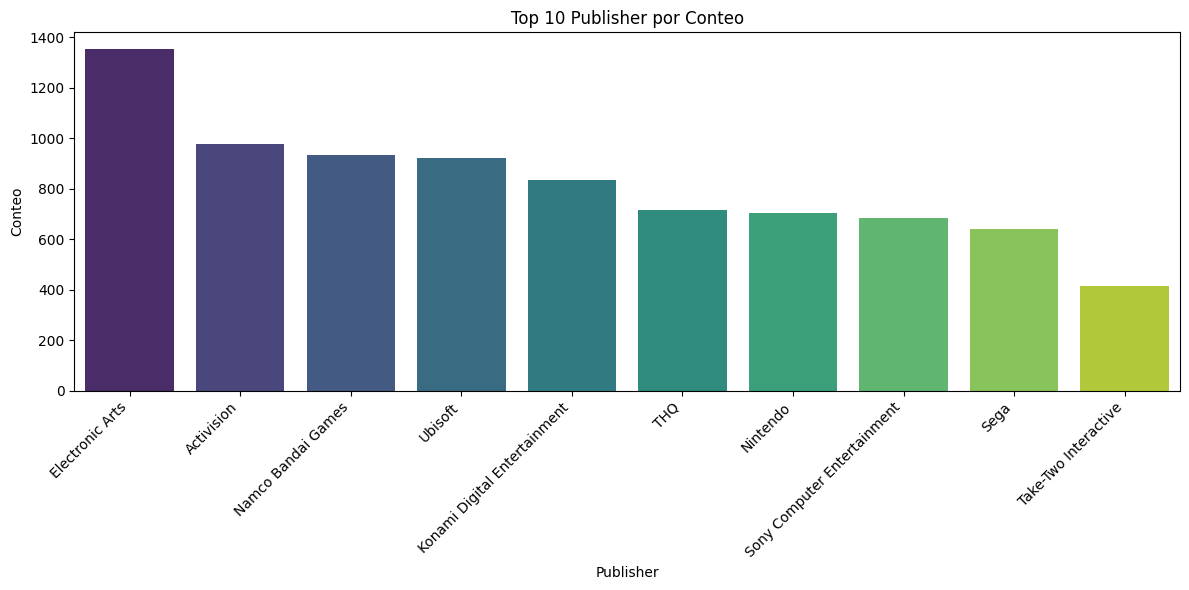

In [69]:
# Visualizar los 10 principales editores
# Selecciona las columnas categóricas (excluyendo 'Name' y 'Rank' ya que son identificadores únicos)
categorical_cols = df_vgsales.select_dtypes(include='object').columns.tolist()
if 'Name' in categorical_cols:
    categorical_cols.remove('Name')
if 'Rank' in categorical_cols and 'Rank' in df_vgsales.columns:
    categorical_cols.remove('Rank')

# Itera a través de cada columna categórica y grafica los 10 valores principales
for col in categorical_cols:
    # Calcula el conteo de valores para la columna actual
    value_counts = df_vgsales[col].value_counts()

    # Selecciona los 10 valores principales
    top_10_values = value_counts.head(10)

    # Crea un gráfico de barras
    plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura para mejor legibilidad
    sns.barplot(x=top_10_values.index, y=top_10_values.values, palette='viridis')
    plt.title(f'Top 10 {col} por Conteo')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\AITOR LANDAURO\AppData\Local\Temp\ipykernel_11508\1906320904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_juegos.index, y=top_20_juegos.values, palette='viridis')


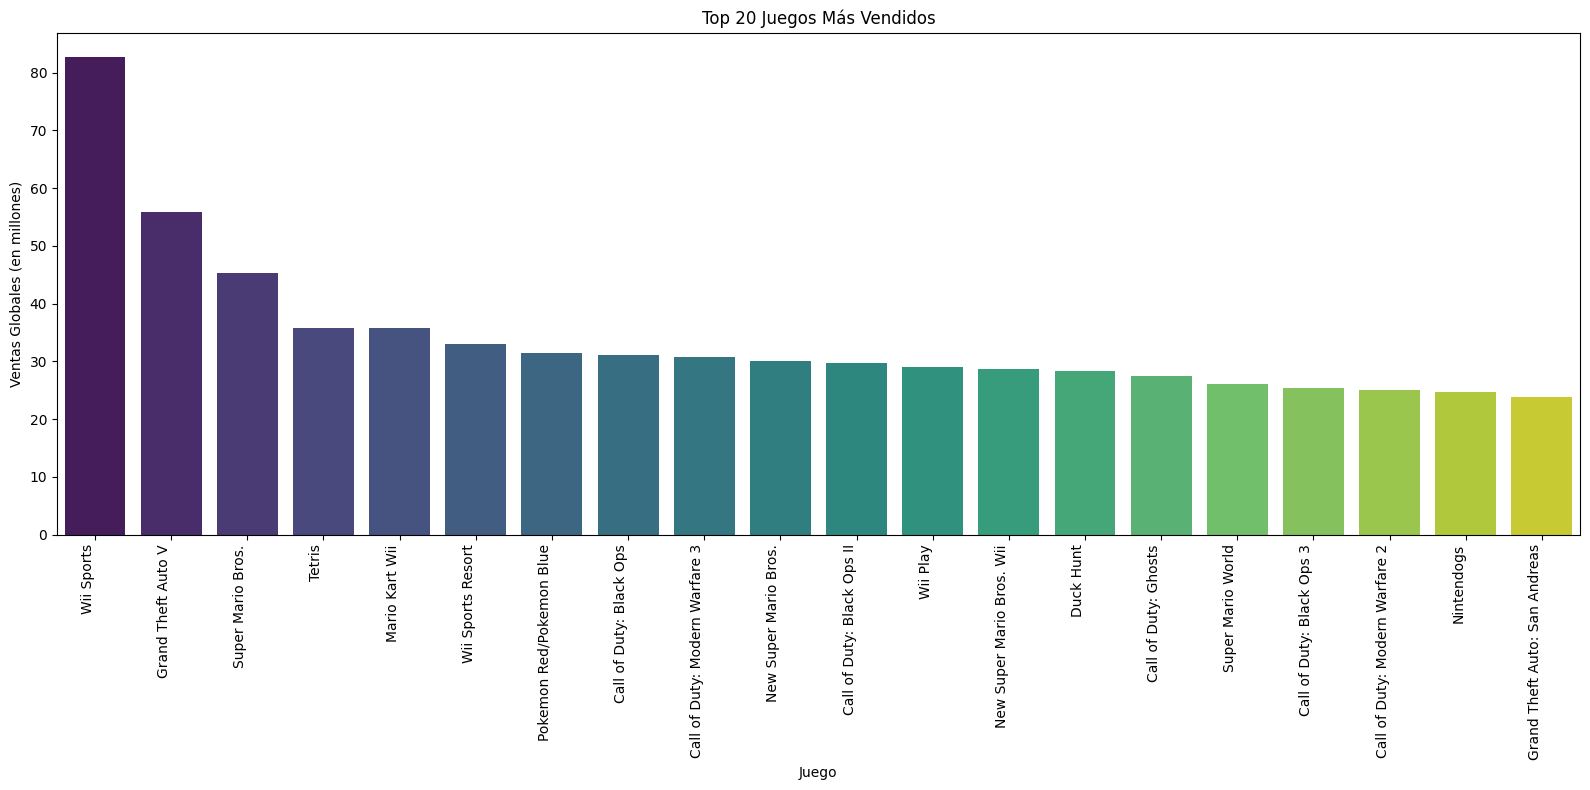

In [70]:
# Calcula las ventas globales por juego
juego_ventas = df_vgsales.groupby('Name')['Global_Sales'].sum()

# Obtiene los 20 juegos más vendidos
top_20_juegos = juego_ventas.nlargest(20)

# Crea un gráfico de barras
plt.figure(figsize=(16, 8))  # Aumenta el tamaño de la figura para mejor visualización
sns.barplot(x=top_20_juegos.index, y=top_20_juegos.values, palette='viridis')
plt.title('Top 20 Juegos Más Vendidos')
plt.xlabel('Juego')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=90, ha='right')  # Rota las etiquetas para mejor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

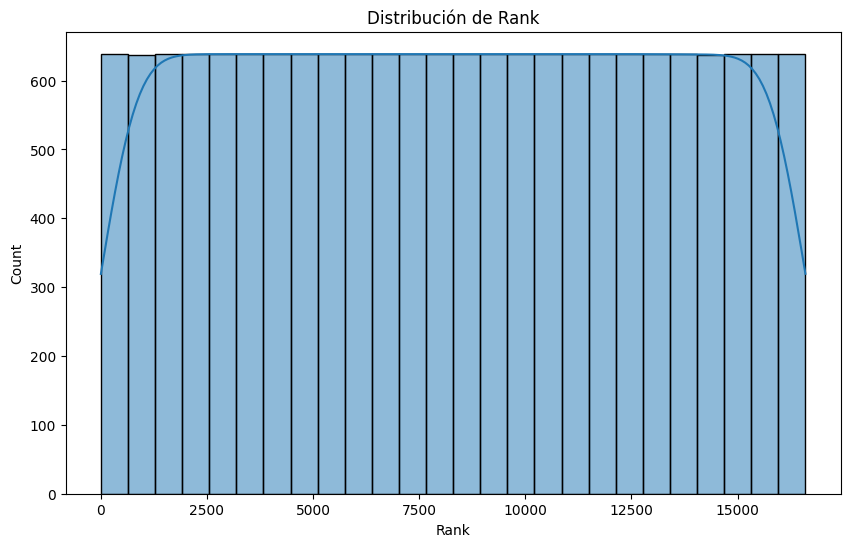

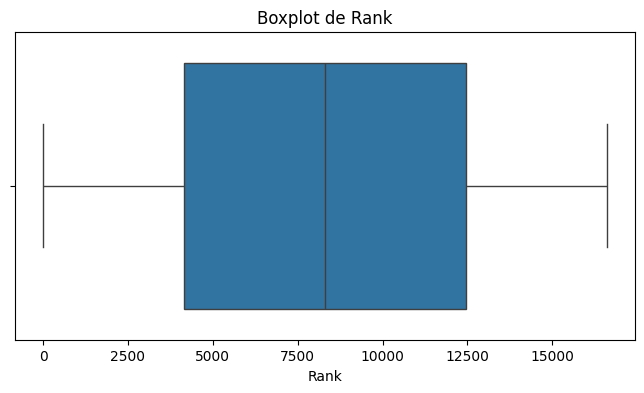

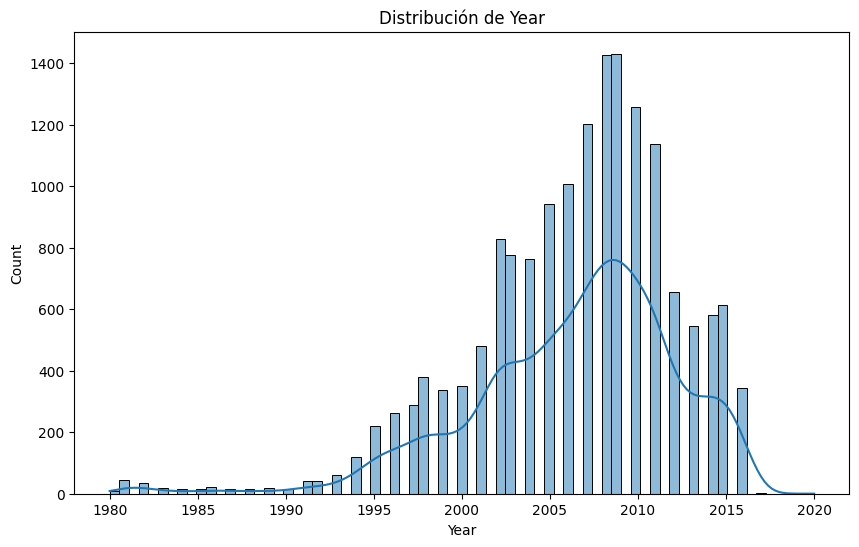

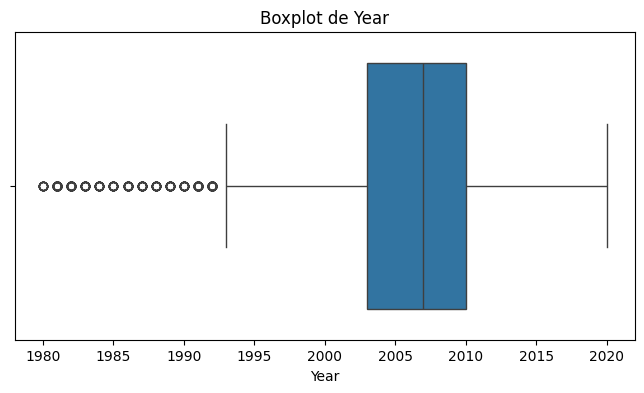

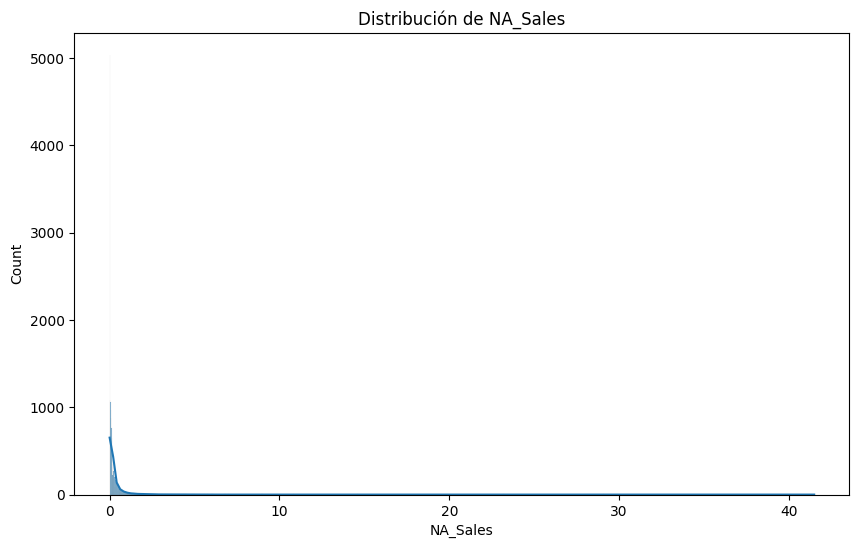

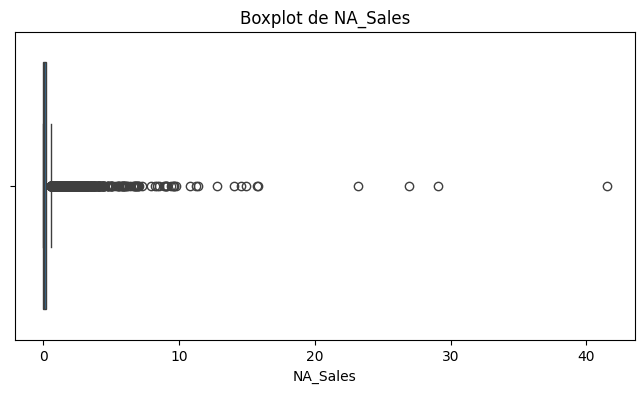

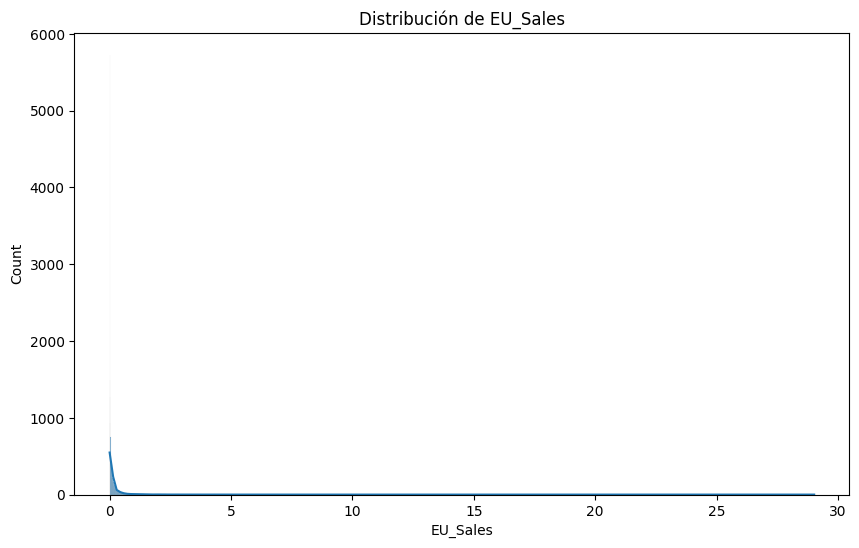

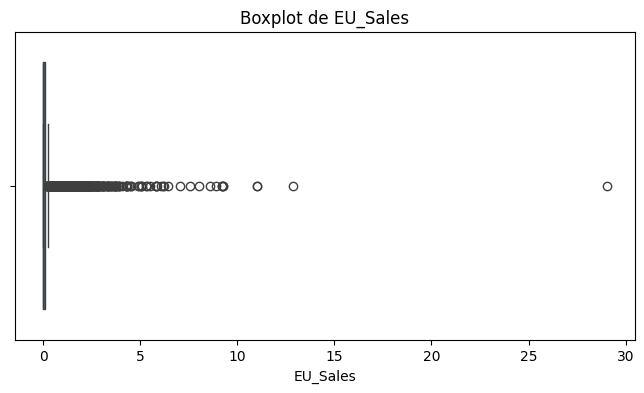

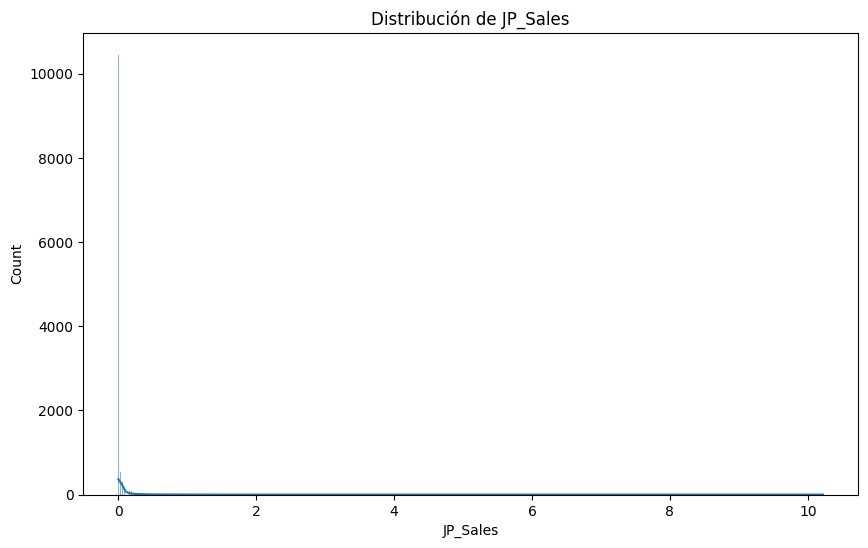

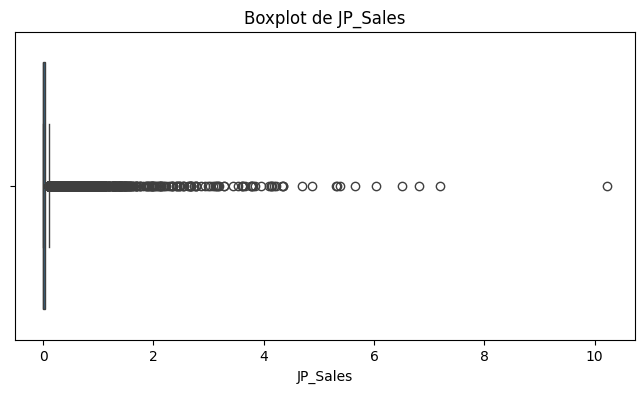

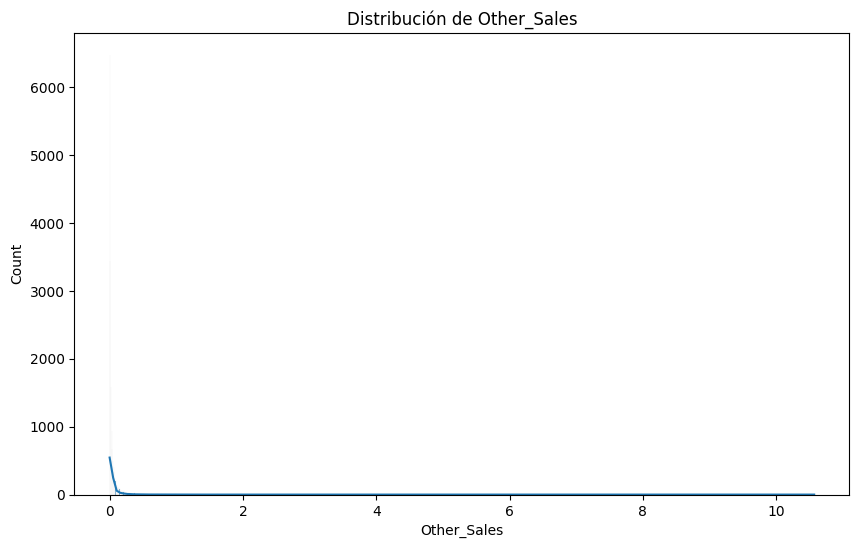

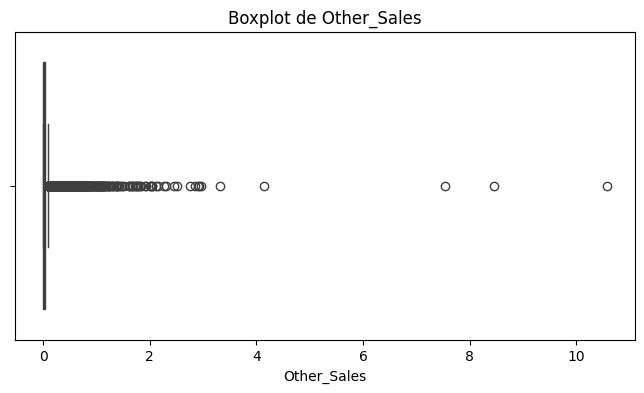

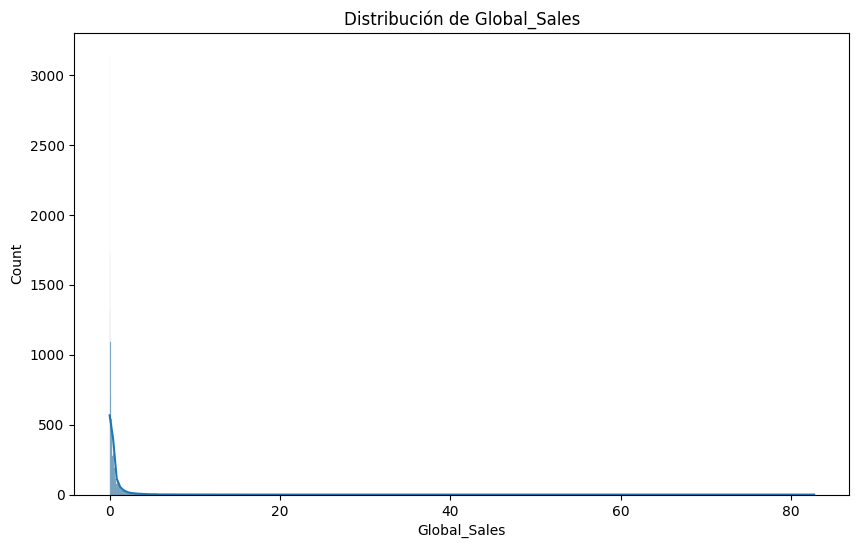

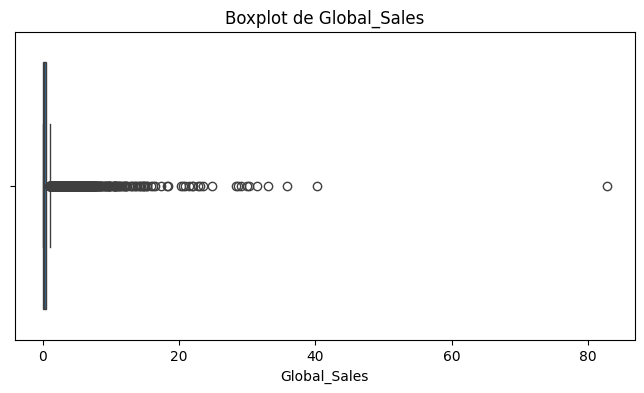

Value counts para Name:
Name
Need for Speed: Most Wanted                                             12
LEGO Marvel Super Heroes                                                 9
Madden NFL 07                                                            9
Ratatouille                                                              9
FIFA 14                                                                  9
                                                                        ..
E.T. The Extra-Terrestrial                                               1
God Eater Off Shot: Tachibana Sakuya-hen Twin Pack & Animation Vol.7     1
Sweet Honey Coming                                                       1
Mahou Sensei Negima!? Neo-Pactio Fight!!                                 1
Super Smash Bros. Brawl                                                  1
Name: count, Length: 11493, dtype: int64


Value counts para Platform:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
P

In [71]:
# Distribuciones de variables numéricas
numerical_cols = df_vgsales.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_vgsales[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_vgsales[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Conteo de valores para variables categóricas
categorical_cols = df_vgsales.select_dtypes(exclude=np.number).columns.tolist()

for col in categorical_cols:
    print(f'Value counts para {col}:')
    print(df_vgsales[col].value_counts())
    print('\n')

Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Year           -0.074735
Rank           -0.427407
Name: Global_Sales, dtype: float64


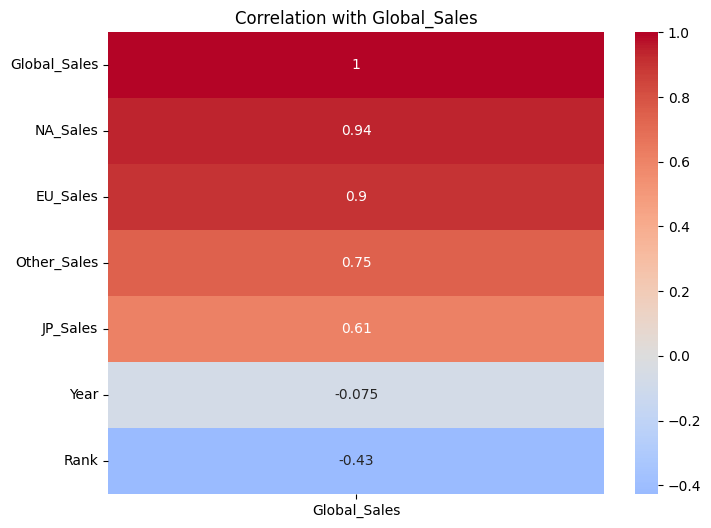

In [72]:
# Calcula la correlación entre las variables numéricas
# y la variable objetivo 'Global_Sales'
corr_matrix = df_vgsales.corr(numeric_only=True)

# Extrae las correlaciones con la variable objetivo 'Global_Sales'
# y ordena de mayor a menor
target_corr = corr_matrix['Global_Sales'].sort_values(ascending=False)

# Print las correlaciones
print(target_corr)

# Plot el heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Global_Sales')
plt.show()

## LIMPIEZA DE DATOS

In [73]:
# LIMPIEZA DE DATOS

# 1. Eliminar filas con valores nulos
df_vgsales.dropna(inplace=True)

# 2. Resetear el índice después de eliminar filas
df_vgsales.reset_index(drop=True, inplace=True)

# 3. Imprimir información sobre los valores nulos restantes
print("Valores nulos después de la limpieza:")
print(df_vgsales.isnull().sum())

# 4. Imprimir información sobre el tipo de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df_vgsales.dtypes)

# 5. Convertir la columna 'Year' a tipo entero
df_vgsales['Year'] = df_vgsales['Year'].astype(int)

# 6. Imprimir información sobre el dataset después de la limpieza
print("\nInformación del dataset después de la limpieza:")
df_vgsales.info()

Valores nulos después de la limpieza:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Tipos de datos de cada columna:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Información del dataset después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291

In [74]:
# Eliminar la columna 'Publisher'y 'name'
df_vgsales.drop('Publisher', axis=1, inplace=True)
df_vgsales.drop('Name', axis=1, inplace=True)

# Imprimir información sobre el dataset después de eliminar la columna
print("\nInformación del dataset después de eliminar la columna 'Publisher':")
df_vgsales.info()


Información del dataset después de eliminar la columna 'Publisher':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   NA_Sales      16291 non-null  float64
 5   EU_Sales      16291 non-null  float64
 6   JP_Sales      16291 non-null  float64
 7   Other_Sales   16291 non-null  float64
 8   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.1+ MB


## TRATAMIENTO DE VARIABLES CATEGORICAS

In [75]:
# Imprimir el número de valores únicos para cada columna
for column in df_vgsales.columns:
    num_unique_values = df_vgsales[column].nunique()
    print(f"Columna '{column}': {num_unique_values} valores únicos")

Columna 'Rank': 16291 valores únicos
Columna 'Platform': 31 valores únicos
Columna 'Year': 39 valores únicos
Columna 'Genre': 12 valores únicos
Columna 'NA_Sales': 408 valores únicos
Columna 'EU_Sales': 305 valores únicos
Columna 'JP_Sales': 244 valores únicos
Columna 'Other_Sales': 157 valores únicos
Columna 'Global_Sales': 621 valores únicos


In [76]:
# Imprimir todas las plataformas diferentes
plataformas_diferentes = df_vgsales['Platform'].unique()
print("Plataformas diferentes:")
print(plataformas_diferentes)

Plataformas diferentes:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [77]:
# Definir los 5 grupos de plataformas
platform_groups = {
    'Portatiles': ['DS', 'GB', 'GBA', '3DS', 'PSP', 'PSV'],
    'PlayStation': ['PS', 'PS2', 'PS3', 'PS4', 'PS5'],
    'Nintendo': ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'Switch'],
    'Xbox': ['XB', 'X360', 'XOne', 'XSeries'],
    'Otros': ['PC','2600', 'DC', 'SAT', 'TG16', '3DO', 'GG', 'SCD', 'WS', 'NG', 'GEN', 'NGage']
}

# Crear una función para asignar cada plataforma a su grupo
def assign_platform_group(platform):
    for group, platforms in platform_groups.items():
        if platform in platforms:
            return group
    return 'Otros'  # Para plataformas no especificadas

# Aplicar la función para crear una nueva columna 'Platform_Group'
df_vgsales['Platform_Group'] = df_vgsales['Platform'].apply(assign_platform_group)

# Imprimir el número de valores únicos para cada columna
for column in df_vgsales.columns:
    num_unique_values = df_vgsales[column].nunique()
    print(f"Columna '{column}': {num_unique_values} valores únicos")

# Imprimir todas las plataformas diferentes
plataformas_diferentes = df_vgsales['Platform_Group'].unique()
print("Plataformas diferentes:")
print(plataformas_diferentes)

# Aplica One-Hot Encoding a la columna 'Platform_Group'
dummies_platform = pd.get_dummies(df_vgsales['Platform_Group'], prefix='Platform')

# Concatena las nuevas columnas al DataFrame original
df_vgsales = pd.concat([df_vgsales, dummies_platform], axis=1)

# Elimina la columna original 'Platform' y 'Platform_Group'
df_vgsales.drop('Platform', axis=1, inplace=True)
df_vgsales.drop('Platform_Group', axis=1, inplace=True)

# Imprimir información del dataset después de aplicar One-Hot Encoding
print("\nInformación del dataset después de aplicar One-Hot Encoding:")
df_vgsales.info()

Columna 'Rank': 16291 valores únicos
Columna 'Platform': 31 valores únicos
Columna 'Year': 39 valores únicos
Columna 'Genre': 12 valores únicos
Columna 'NA_Sales': 408 valores únicos
Columna 'EU_Sales': 305 valores únicos
Columna 'JP_Sales': 244 valores únicos
Columna 'Other_Sales': 157 valores únicos
Columna 'Global_Sales': 621 valores únicos
Columna 'Platform_Group': 5 valores únicos
Plataformas diferentes:
['Nintendo' 'Portatiles' 'Xbox' 'PlayStation' 'Otros']

Información del dataset después de aplicar One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  16291 non-null  int64  
 1   Year                  16291 non-null  int64  
 2   Genre                 16291 non-null  object 
 3   NA_Sales              16291 non-null  float64
 4   EU_Sales              16291 non-null  float64
 5  

In [78]:
# Imprimir los 12 géneros únicos
generos_diferentes = df_vgsales['Genre'].unique()
print("Géneros diferentes:")
print(generos_diferentes)

Géneros diferentes:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [79]:
# Definir los grupos de géneros
genre_groups = {
    'Accion': ['Action', 'Shooter', 'Fighting', 'Platform'],
    'Deportes': ['Sports', 'Racing'],
    'Mind': ['Role-Playing','Strategy', 'Puzzle'],
    'Otros': ['Misc', 'Adventure', 'Simulation']
}

# Crear una función para asignar cada género a su grupo
def assign_genre_group(genre):
    for group, genres in genre_groups.items():
        if genre in genres:
            return group
    return 'Otros'  # Para géneros no especificados

# Aplicar la función para crear una nueva columna 'Genre_Group'
df_vgsales['Genre_Group'] = df_vgsales['Genre'].apply(assign_genre_group)

# Imprimir el número de valores únicos para cada columna
for column in df_vgsales.columns:
    num_unique_values = df_vgsales[column].nunique()
    print(f"Columna '{column}': {num_unique_values} valores únicos")

# Imprimir todos los generos diferentes
generos_diferentes = df_vgsales['Genre_Group'].unique()
print("Géneros diferentes:")
print(generos_diferentes)

# Aplica One-Hot Encoding a la columna 'Genre_Group'
dummies_genre = pd.get_dummies(df_vgsales['Genre_Group'], prefix='Genre')

# Concatena las nuevas columnas al DataFrame original
df_vgsales = pd.concat([df_vgsales, dummies_genre], axis=1)

# Elimina la columna original 'Genre' y 'Genre_Group'
df_vgsales.drop('Genre', axis=1, inplace=True)
df_vgsales.drop('Genre_Group', axis=1, inplace=True)

# Imprimir información del dataset después de aplicar One-Hot Encoding
print("\nInformación del dataset después de aplicar One-Hot Encoding:")
df_vgsales.info()

Columna 'Rank': 16291 valores únicos
Columna 'Year': 39 valores únicos
Columna 'Genre': 12 valores únicos
Columna 'NA_Sales': 408 valores únicos
Columna 'EU_Sales': 305 valores únicos
Columna 'JP_Sales': 244 valores únicos
Columna 'Other_Sales': 157 valores únicos
Columna 'Global_Sales': 621 valores únicos
Columna 'Platform_Nintendo': 2 valores únicos
Columna 'Platform_Otros': 2 valores únicos
Columna 'Platform_PlayStation': 2 valores únicos
Columna 'Platform_Portatiles': 2 valores únicos
Columna 'Platform_Xbox': 2 valores únicos
Columna 'Genre_Group': 4 valores únicos
Géneros diferentes:
['Deportes' 'Accion' 'Mind' 'Otros']

Información del dataset después de aplicar One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  16291 non-null  int64  
 1   Year                  16291 non-null  

In [80]:
# Imprimir información del dataset después de aplicar One-Hot Encoding
print("\nInformación del dataset después de aplicar One-Hot Encoding:")
df_vgsales.info()

# Convertir columnas booleanas a numéricas (1 y 0)
for column in df_vgsales.columns:
    if df_vgsales[column].dtype == 'bool':
        df_vgsales[column] = df_vgsales[column].astype(int)

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión booleana:")
print(df_vgsales.dtypes)


Información del dataset después de aplicar One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  16291 non-null  int64  
 1   Year                  16291 non-null  int64  
 2   NA_Sales              16291 non-null  float64
 3   EU_Sales              16291 non-null  float64
 4   JP_Sales              16291 non-null  float64
 5   Other_Sales           16291 non-null  float64
 6   Global_Sales          16291 non-null  float64
 7   Platform_Nintendo     16291 non-null  bool   
 8   Platform_Otros        16291 non-null  bool   
 9   Platform_PlayStation  16291 non-null  bool   
 10  Platform_Portatiles   16291 non-null  bool   
 11  Platform_Xbox         16291 non-null  bool   
 12  Genre_Accion          16291 non-null  bool   
 13  Genre_Deportes        16291 non-null  bool   
 14  Genre_Mi

## SEPARAR VARIABLES X/Y

In [82]:
# SEPARAR VARIABLES X/Y
X = df_vgsales.drop('Global_Sales', axis=1)  # Features (todas las columnas excepto Global_Sales)
y = df_vgsales['Global_Sales']  # Target variable (Global_Sales)

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Primeras filas de X:")
print(X.head())
print("Primeras filas de y:")
print(y.head())

Shape de X: (16291, 15)
Shape de y: (16291,)
Primeras filas de X:
   Rank  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_Nintendo  \
0     1  2006     41.49     29.02      3.77         8.46                  1   
1     2  1985     29.08      3.58      6.81         0.77                  1   
2     3  2008     15.85     12.88      3.79         3.31                  1   
3     4  2009     15.75     11.01      3.28         2.96                  1   
4     5  1996     11.27      8.89     10.22         1.00                  0   

   Platform_Otros  Platform_PlayStation  Platform_Portatiles  Platform_Xbox  \
0               0                     0                    0              0   
1               0                     0                    0              0   
2               0                     0                    0              0   
3               0                     0                    0              0   
4               0                     0                    1    

## DIVIDIR EN ENTRENAMIENTO Y PRUEBA

In [87]:
# DIVIDIR EN ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (11403, 15)
Shape de X_test: (4888, 15)
Shape de y_train: (11403,)
Shape de y_test: (4888,)


## ENTRENAR MODELO

In [88]:
# CREAR Y ENTRENAR EL MODELO DE REGRESIÓN LINEAL
model = LinearRegression()
model.fit(X_train, y_train)

print("Modelo entrenado!")

Modelo entrenado!


## PREDECIR Y EVALUAR (METRICAS)

In [89]:
# PREDECIR Y EVALUAR (METRICAS)
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 2.817471652997303e-05
R-squared (R2): 0.9999915828239557
Mean Absolute Error (MAE): 0.0031100543654415053


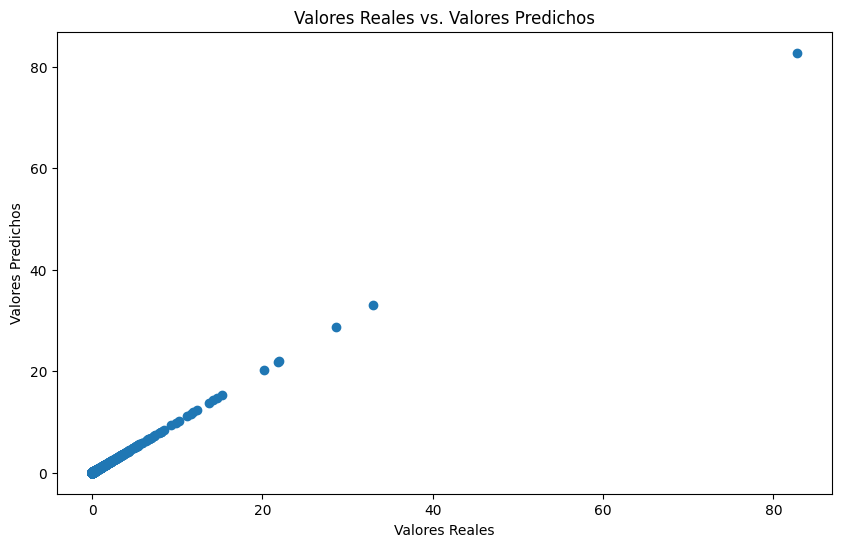

In [86]:
# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.show()

## OTRO MODELO

Mean Squared Error (MSE): 0.5727648139696391
R-squared (R2): 0.8288869289585621
Mean Absolute Error (MAE): 0.033825153432246874


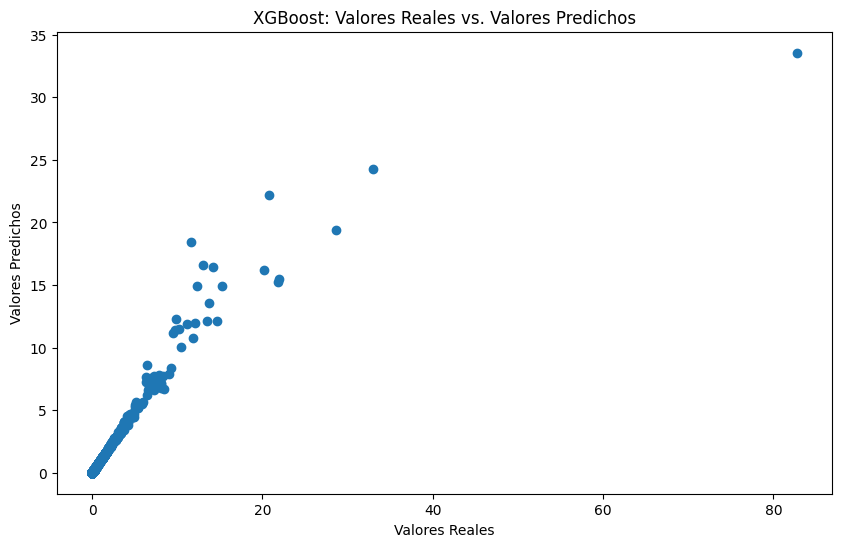

In [90]:
# Inicializar y entrenar el modelo XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("XGBoost: Valores Reales vs. Valores Predichos")
plt.show()

## CONCLUSIONES

Podemos observar que el modelo funciona casi a la perfeccion, sobretodo en el modelo de LinearRegression, esto se debe que los estamos entrenando con las ventas de diferentes paises, y estos datos estan super correlacionados con el target, al hacer la prueba sin estos datos obviamente el modelo cae bastante.